In [83]:
# k-Fold Cross Validation

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_table('data.txt')
X = dataset.values[:,:3]
r_y = dataset.values[:,3]
y = [1.0 if i == 1 else 0.0 for i in r_y]
y = np.array(y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Oversampling
#ros = RandomOverSampler()
#X, y = ros.fit_sample(X, y)


In [ ]:
import time
import sys

def display_time(seconds, granularity=2):
    result = []
    intervals = (
    ('semanas', 604800),  # 60 * 60 * 24 * 7
    ('dias', 86400),    # 60 * 60 * 24
    ('horas', 3600),    # 60 * 60
    ('minutos', 60),
    ('segundos', 1),
    )

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result[:granularity])

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score

# Applying k-Fold Cross Validation
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

# regularization
reg = np.linspace(1e-10, 1e10, num=50)
alpha = np.linspace(0.0, 2.0, num=50)

total_tasks = 50
tasks_count = 0
last_time = 0
start_time = time.time()

reg_accuracies = []
reg_log_losses = []
reg_mse = []
reg_precision_1 = []
reg_precision_0 = []

for r in range(len(reg)):
    # Logistic Regression
    accuracies = []
    log_losses = []
    mse = []
    precision_1 = []
    precision_0 = []

    for i in range(10):
        skf = StratifiedKFold(n_splits = 3, shuffle=True)
        for train, test in skf.split(X, y):
            X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
            #c_reg = 1/reg[r]
            #classifier = LogisticRegression(C = reg[r], tol=0.01)
            classifier = MLPClassifier(hidden_layer_sizes=(0,), alpha=alpha[r], activation='logistic')
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            y_prob = classifier.predict_proba(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
            precision_1.append(precision_score(y_test, y_pred, pos_label=1))
            precision_0.append(precision_score(y_test, y_pred, pos_label=0))
            log_losses.append(log_loss(y_test, y_prob))
            mse.append(mean_squared_error(y_test, y_prob[:, 1]))

    reg_accuracies.append((np.array(accuracies)).mean())
    reg_precision_1.append((np.array(precision_1)).mean())
    reg_precision_0.append((np.array(precision_0)).mean())
    reg_log_losses.append((np.array(log_losses)).mean())
    reg_mse.append((np.array(mse)).mean())
    
    tasks_count += 1
    last_time = time.time()
    exec_time = last_time - start_time
    remaining_time = (total_tasks - tasks_count) * (exec_time) / tasks_count
    sys.stdout.write("\rCalculado ... %.2f%%. Tempo execução: %s. Tempo restante estimado: %s" % (((100.0 * tasks_count / total_tasks)), display_time(last_time - start_time), display_time(remaining_time)))
    sys.stdout.flush()


In [19]:
reg_log_losses

[0.69314717385676383,
 0.49958226666960243,
 0.49974165560608586,
 0.49942957176223457,
 0.50036738250130885,
 0.49919669983491288,
 0.49986343920945758,
 0.49954838272360008,
 0.49989698085645146,
 0.49945093614133584,
 0.50018378425065924,
 0.49963793915329935,
 0.49896336434021316,
 0.49933969658148381,
 0.49972726572967774,
 0.49998749503312467,
 0.49967406786434126,
 0.49946587984260787,
 0.49955089287986054,
 0.49971838330979174,
 0.49983152424921434,
 0.49998895735780768,
 0.49971616114912965,
 0.49963115445733197,
 0.49912881810162946,
 0.49969042017772514,
 0.49935996470009486,
 0.49961839471487046,
 0.49945181272674644,
 0.49994291669423901,
 0.49969126227740857,
 0.49952175819200834,
 0.49889944879862713,
 0.49988719205817822,
 0.50014898312873446,
 0.49968986286584099,
 0.49932711677831665,
 0.49955441744476786,
 0.49941340348286872,
 0.49950647979170987,
 0.49957165085247546,
 0.49953468674897133,
 0.49932392887227328,
 0.49944663105376508,
 0.49947427147003753,
 0.5000856

/home/rodrigo/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


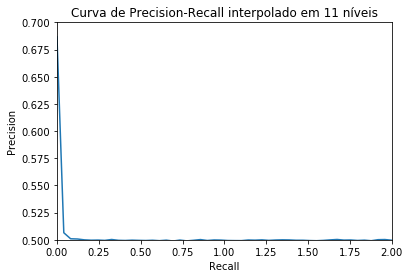

In [5]:
rec_x = np.arange(0, 1.1, 0.1)

plt.plot(reg, reg_log_losses)

plt.xlim([0.0, 2.0])
plt.ylim([0.5, 0.7])
plt.xlabel('alpha')
plt.ylabel('Precision')
plt.title("Curva de Precision-Recall interpolado em 11 níveis")
plt.legend(loc='upper right')
plt.show()

In [11]:
np.linspace(1e-5, 1e5, num=50)

array([  1.00000000e-05,   2.04081634e+03,   4.08163266e+03,
         6.12244899e+03,   8.16326532e+03,   1.02040816e+04,
         1.22448980e+04,   1.42857143e+04,   1.63265306e+04,
         1.83673469e+04,   2.04081633e+04,   2.24489796e+04,
         2.44897959e+04,   2.65306123e+04,   2.85714286e+04,
         3.06122449e+04,   3.26530612e+04,   3.46938776e+04,
         3.67346939e+04,   3.87755102e+04,   4.08163265e+04,
         4.28571429e+04,   4.48979592e+04,   4.69387755e+04,
         4.89795918e+04,   5.10204082e+04,   5.30612245e+04,
         5.51020408e+04,   5.71428571e+04,   5.91836735e+04,
         6.12244898e+04,   6.32653061e+04,   6.53061225e+04,
         6.73469388e+04,   6.93877551e+04,   7.14285714e+04,
         7.34693878e+04,   7.55102041e+04,   7.75510204e+04,
         7.95918367e+04,   8.16326531e+04,   8.36734694e+04,
         8.57142857e+04,   8.77551020e+04,   8.97959184e+04,
         9.18367347e+04,   9.38775510e+04,   9.59183673e+04,
         9.79591837e+04,

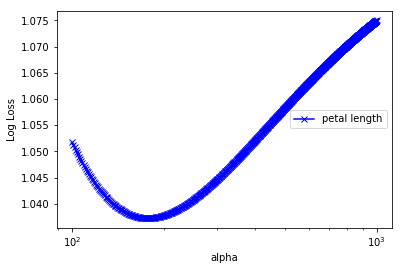

In [67]:
# scikit-learn logistic regression

from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

weights, params = [], []
log_losses = []
for a in np.linspace(1e2, 1e3, num=1000): #np.arange(-10, 10):
   lr = LogisticRegression(C=1/a, random_state=0)
   lr.fit(X_train_std, y_train)
   weights.append(lr.coef_[1])
   params.append(a)
   y_prob = lr.predict_proba(X_test)
   log_losses.append(log_loss(y_test, y_prob))

weights = np.array(weights)

# Decision region drawing
import matplotlib.pyplot as plt

plt.plot(params, log_losses, color='blue', marker='x', label='petal length')
#plt.plot(params, weights[:, 1], color='green',  marker='o', label='petal width')
plt.ylabel('Log Loss')
plt.xlabel('alpha')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

In [58]:
log_losses

[1.0986122611409594,
 1.0986122613867375,
 1.0986122616281657,
 1.098612261865358,
 1.0986122620984256,
 1.0986122623274746,
 1.0986122625526082,
 1.0986122627739257,
 1.0986122629915243,
 1.0986122632054955,
 1.0986122634159303,
 1.0986122636229152,
 1.0986122638265348,
 1.0986122640268703,
 1.0986122642239999,
 1.0986122644180008,
 1.0986122646089465,
 1.098612264796909,
 1.0986122649819565,
 1.0986122651641577,
 1.0986122653435773,
 1.0986122655202781,
 1.098612265694322,
 1.0986122658657682,
 1.0986122660346744,
 1.0986122662010966,
 1.0986122663650895,
 1.0986122665267055,
 1.0986122666859961,
 1.0986122668430114,
 1.0986122669977993,
 1.0986122671504071,
 1.0986122673008807,
 1.0986122674492642,
 1.0986122675956007,
 1.098612267739933,
 1.0986122678823014,
 1.0986122680227461,
 1.0986122681613057,
 1.0986122682980175,
 1.0986122684329189,
 1.0986122685660453,
 1.0986122686974311,
 1.0986122688271109,
 1.0986122689551174,
 1.0986122690814828,
 1.0986122692062383,
 1.09861226932941

alpha: 2.06206206212


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


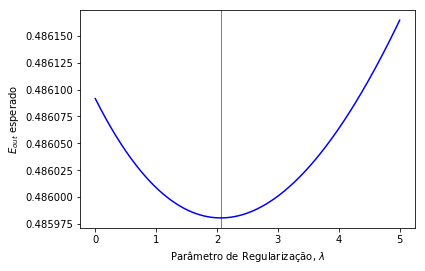

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

weights, params = [], []
log_losses = []
for a in np.linspace(1e-10, 5, num=1000): #np.arange(-10, 10):
   lr = LogisticRegression(C=1/a, random_state=0)
   lr.fit(X_train, y_train)
   #weights.append(lr.coef_[1])
   params.append(a)
   y_prob = lr.predict_proba(X_test)
   log_losses.append(log_loss(y_test, y_prob))

#weights = np.array(weights)

# Decision region drawing
import matplotlib.pyplot as plt

m_a = params[0]
m_log = log_losses[0]
for i in range(len(params)):
    if log_losses[i] < m_log:
        m_a = params[i]
        m_log = log_losses[i]
        
print('alpha: '+ str(m_a))

plt.plot(params, log_losses, color='blue') # , label='petal length')
#plt.plot(params, weights[:, 1], color='green',  marker='o', label='petal width')
plt.ylabel('$E_{out}$ esperado')
plt.xlabel('Parâmetro de Regularização, $\lambda$')
plt.legend(loc='right')
#plt.xscale('log')
plt.axvline(x=m_a, color='black', linewidth=0.5)
plt.show()



In [139]:
log_losses

[0.48609162889567226,
 0.48609117758549447,
 0.48609072727709429,
 0.48609027796993004,
 0.48608982966346059,
 0.48608938235714533,
 0.48608893605044368,
 0.48608849074281546,
 0.48608804643372144,
 0.48608760312262206,
 0.48608716080897874,
 0.48608671949225263,
 0.48608627917190578,
 0.48608583984740045,
 0.48608540151819929,
 0.48608496418376529,
 0.48608452784356188,
 0.4860840924970527,
 0.48608365814370202,
 0.48608322478297444,
 0.48608279241433466,
 0.48608236103724811,
 0.48608193065118033,
 0.48608150125559729,
 0.48608107284996566,
 0.4860806454337519,
 0.48608021900642323,
 0.48607979356744746,
 0.48607936911629196,
 0.48607894565242549,
 0.48607852317531647,
 0.48607810168443383,
 0.48607768117924705,
 0.48607726165922588,
 0.48607684312384036,
 0.48607642557256114,
 0.48607600900485887,
 0.48607559342020501,
 0.48607517881807105,
 0.48607476519792903,
 0.48607435255925124,
 0.48607394090151029,
 0.48607353022417937,
 0.48607312052673191,
 0.48607271180864181,
 0.486072304

In [112]:
1e-1

0.1